In [25]:
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.preprocessing import RobustScaler
from sklearn import model_selection
from sklearn.neural_network import MLPClassifier

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

plt.style.use('seaborn')

path = "training_data.csv"

data = pd.read_csv(path)
data = data.sample(frac=1)

features = [feature for feature in list(data.head(0)) if feature not in ("Well Name", "Formation", "Facies")]

non_carbonates = (1,2,3,4,5)
carbonates = (6,7,8,9)

target = 'Carbonate'

data[target] = np.where(data['Facies'] > 5, 1, 0)

X = data[features]

y = data[target]

scaler = RobustScaler()
scaler.fit(X)
X = scaler.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

train_sizes = list(range(295,2065,295))

def tv_scores_mean(estimator, X, y, train_sizes, scoring='accuracy', shuffle=True, cv=5):
    train_sizes, train_scores, validation_scores = learning_curve(estimator = estimator, X=X, y=y, 
                                                                  train_sizes=train_sizes, scoring=scoring, 
                                                                  shuffle=shuffle, cv=cv)
    train_scores_mean = train_scores.mean(axis = 1)
    validation_scores_mean = validation_scores.mean(axis = 1)
    return train_sizes, train_scores_mean, validation_scores_mean

def plot_learning_curve(train_sizes, train_scores_mean, validation_scores_mean):
    plt.plot(train_sizes, train_scores_mean, label = 'Training accuracy')
    plt.plot(train_sizes, validation_scores_mean, label = 'Validation accuracy')
    plt.ylabel('Accuracy', fontsize = 14)
    plt.xlabel('Training set size', fontsize = 14)
    plt.title('Learning curves', fontsize = 18, y = 1.03)
    plt.legend()
    plt.ylim(0,1)

def randomizedsearch_helper(grid, estimator, X, y):
    gridsearch = model_selection.RandomizedSearchCV(estimator = estimator, param_distributions=grid)
    gridsearch.fit(X,y)
    return (gridsearch.best_estimator_, gridsearch.best_score_, gridsearch.best_params_)

def model_helper(grid, classifier, X, y, randomsearch = True):
    if randomsearch:
        est, acc, param = randomizedsearch_helper(grid, classifier, X, y)
    else:
        est, acc, param = gridsearch_helper(grid, classifier, X, y)
    est.fit(X_train,y_train)
    print(acc)
    print(est)
    return (est, acc, param)


0.8735009671179884
MLPClassifier(activation='relu', alpha=10, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=8, learning_rate='constant',
       learning_rate_init=0.001, max_iter=500, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)


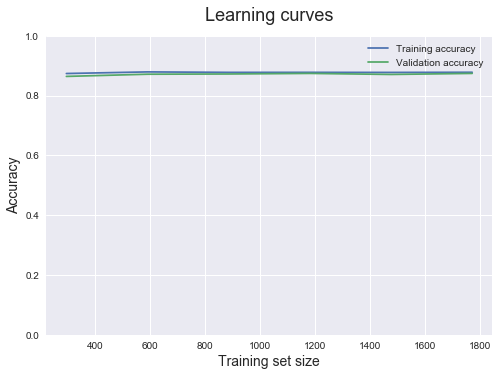

In [30]:
nn_grid = {'hidden_layer_sizes': [n for n in range(5,10,1)], 
           'alpha':[10,100]}
result = model_helper(nn_grid, MLPClassifier(random_state=1, max_iter=500), X_train, y_train)
nn_est = result[0]
plot_learning_curve(*tv_scores_mean(nn_est,X_train,y_train,train_sizes))

In [27]:
df_out = pd.DataFrame(X)
df_out['Carbonate'] = y
df_out.to_csv('preprocessed_training_data.csv')
df_out.head()

,0,1,2,3,4,5,6,7,Carbonate
0,0.219577,-1.463319,0.236146,-1.860024,-0.456396,1.123750,1.0,0.060698,0
1,-0.039683,-1.247160,1.714343,0.303677,-0.910324,1.873750,1.0,-0.052605,0
2,0.034392,-0.255950,-0.035742,0.417556,-0.172690,-0.209583,0.0,-0.542236,0
3,1.156085,-0.715692,1.329949,-0.238197,-0.763784,-0.194583,1.0,0.600910,0
4,-1.039683,-0.679095,1.573711,-0.341637,-1.036142,0.790417,1.0,-0.273141,0


In [22]:
best_class = MLPClassifier(activation='relu', alpha=0.1, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=80, learning_rate='constant',
       learning_rate_init=0.001, max_iter=500, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

best_class.fit(X_train,y_train)
y_pred = best_class.predict(X_test)

print(sklearn.metrics.accuracy_score(y_test, y_pred))
print(sklearn.metrics.f1_score(y_test, y_pred, average='macro'))

0.9119010819165378
0.90717430208939
